# Linear Regression Model

In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics as sm
from sklearn.preprocessing import scale
from sklearn import metrics as sm
from sklearn.metrics import r2_score
from scipy.stats import skew
from scipy.stats.stats import pearsonr

In [54]:
df1 = pd.read_excel('E:/Project Session/Portfolio Project 1/cleaned_Airbnb.xlsx')

In [20]:
df1.head()

,Host Response Time,Country,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Price,...,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Calculated host listings count,No.of Amenities,Nights_Maximum,Availability_365
0,within an hour,Ireland,Bed & Breakfast,Private room,3,1.5,1,2,Real Bed,48,...,10,10,10,9,10,moderate,2,20,30,230
1,within an hour,Spain,House,Entire home/apt,8,4.0,4,5,Real Bed,380,...,10,10,10,6,8,strict,38,11,237,237
2,within an hour,United States,House,Entire home/apt,8,2.5,3,3,Real Bed,165,...,10,10,10,10,10,strict,1,26,3,3
3,within a few hours,United States,House,Entire home/apt,4,2.0,1,1,Real Bed,145,...,8,10,10,6,8,flexible,1,14,0,0
4,within an hour,Netherlands,Apartment,Entire home/apt,2,1.0,0,1,Real Bed,110,...,7,10,10,10,7,flexible,1,11,0,0


In [14]:
df1.columns

Index(['Host Response Time', 'Country', 'Property Type', 'Room Type',
       'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Bed Type', 'Price',
       'Security Deposit', 'Cleaning Fee', 'Guests Included',
       'Number of Reviews', 'Review Scores Accuracy',
       'Review Scores Cleanliness', 'Review Scores Checkin',
       'Review Scores Communication', 'Review Scores Location',
       'Review Scores Value', 'Cancellation Policy',
       'Calculated host listings count', 'No.of Amenities', 'Nights_Maximum',
       'Availability_365'],
      dtype='object')

In [30]:
# dummy variables for categorical features
df_dummies = pd.get_dummies(data=df1,columns=['Host Response Time','Country','Property Type','Room Type','Bed Type','Cancellation Policy'])
df_dummies.head()

,Accommodates,Bathrooms,Bedrooms,Beds,Price,Security Deposit,Cleaning Fee,Guests Included,Number of Reviews,Review Scores Accuracy,...,Cancellation Policy_flexible,Cancellation Policy_flexible_new,Cancellation Policy_moderate,Cancellation Policy_moderate_new,Cancellation Policy_no_refunds,Cancellation Policy_strict,Cancellation Policy_strict_new,Cancellation Policy_super_strict_30,Cancellation Policy_super_strict_30_new,Cancellation Policy_super_strict_60
0,3,1.5,1,2,48,100,0,1,46,10,...,0,0,1,0,0,0,0,0,0,0
1,8,4.0,4,5,380,0,0,1,1,8,...,0,0,0,0,0,1,0,0,0,0
2,8,2.5,3,3,165,250,90,6,20,10,...,0,0,0,0,0,1,0,0,0,0
3,4,2.0,1,1,145,100,50,1,1,10,...,1,0,0,0,0,0,0,0,0,0
4,2,1.0,0,1,110,0,35,1,2,7,...,1,0,0,0,0,0,0,0,0,0


In [23]:
df_dummies.columns

Index(['Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Price',
       'Security Deposit', 'Cleaning Fee', 'Guests Included',
       'Number of Reviews', 'Review Scores Accuracy',
       'Review Scores Cleanliness', 'Review Scores Checkin',
       'Review Scores Communication', 'Review Scores Location',
       'Review Scores Value', 'Calculated host listings count',
       'No.of Amenities', 'Nights_Maximum', 'Availability_365',
       'Host Response Time_a few days or more',
       'Host Response Time_within a day',
       'Host Response Time_within a few hours',
       'Host Response Time_within an hour', 'Country_Australia',
       'Country_Belgium', 'Country_Canada', 'Country_China', 'Country_Denmark',
       'Country_France', 'Country_Germany', 'Country_Greece',
       'Country_Hong Kong', 'Country_Ireland', 'Country_Italy',
       'Country_Netherlands', 'Country_Spain', 'Country_Switzerland',
       'Country_United Kingdom', 'Country_United States',
       'Property Type_Apartme

In [73]:
##################################***LINEAR REGRESSION MODEL***############################################

x = df_dummies.drop('Price',axis=1)
y = df_dummies.loc[:,'Price']

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 1/3, random_state = 30)

In [74]:
linR = LinearRegression().fit(xTrain,yTrain)
pred = linR.predict(xTest)
linR.score(xTest,yTest)

0.7180685397717632

In [75]:
print(r2_score(yTest,pred))

0.7180685397717632


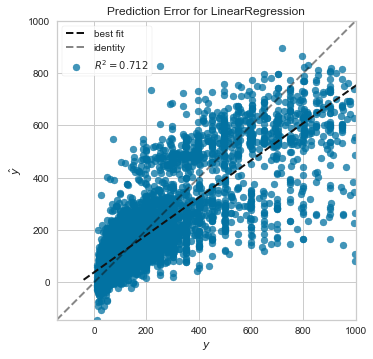

In [15]:
# Residual Plot
from yellowbrick.regressor import PredictionError
# model_1 = LinearRegression()
viz =PredictionError(linR)
viz.score(xTest,yTest)
viz.poof()

# Ridge Regularisation

In [125]:
from sklearn.linear_model import Ridge

# Training the model

ridgereg = Ridge(alpha=0.03,normalize=True).fit(xTrain,yTrain)

pred = ridgereg.predict(xTest)

#Calculating mse

mse=np.mean((pred - yTest)**2)

np.sqrt(mse)

81.58269003706718

In [122]:
# Calculating Score
ridgereg.score(xTest,yTest)

0.7181171786992762

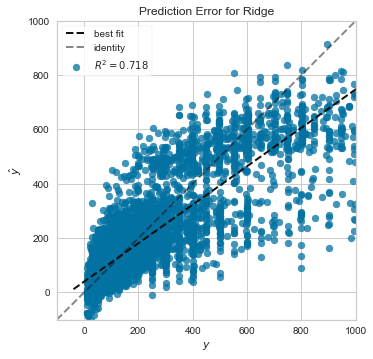

In [123]:
from yellowbrick.regressor import PredictionError
# model_1 = LinearRegression()
viz =PredictionError(ridgereg)
viz.score(xTest,yTest)
viz.poof()

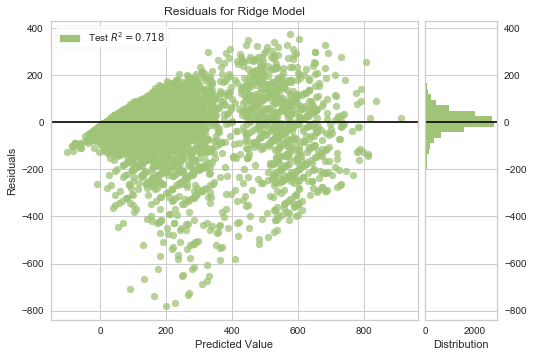

In [124]:
# Residual Plot
# plt.scatter(pred, (pred - yTest), c='b')
from yellowbrick.regressor import ResidualsPlot
res = ResidualsPlot(ridgereg)
res.score(xTest,yTest)
res.poof()